In [2]:
from __future__ import print_function
import os
import sys
import pandas as pd
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 2. Check that an environmental variable PUIDATA exists and that it points to the PUIdata directory

In [5]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/vvt221/PUIdata


In [6]:
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > waterconsumptiondata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   4498      0 --:--:-- --:--:-- --:--:--  4511


In [7]:
!mv waterconsumptiondata.csv $PUIDATA

In [8]:
!ls $PUIDATA

1data.txt
201601-citibike-tripdata.csv
201601-citibike-tripdata.zip
201607-citibike-tripdata.csv
201607-citibike-tripdata.zip
ACS_16_1YR_GCT2801.ST50_with_ann.csv
borough
geo_export_1d7874aa-b3a4-42a9-b5e8-cf6e4977982a.dbf
geo_export_1d7874aa-b3a4-42a9-b5e8-cf6e4977982a.prj
geo_export_1d7874aa-b3a4-42a9-b5e8-cf6e4977982a.shp
geo_export_1d7874aa-b3a4-42a9-b5e8-cf6e4977982a.shx
geo_export_32f8482e-5069-4030-8b91-801c96d7aa90.dbf
geo_export_32f8482e-5069-4030-8b91-801c96d7aa90.prj
geo_export_32f8482e-5069-4030-8b91-801c96d7aa90.shp
geo_export_32f8482e-5069-4030-8b91-801c96d7aa90.shx
geo_export_b6b76027-fa3f-4e5d-8cb9-37fc8ea5cdff.dbf
geo_export_b6b76027-fa3f-4e5d-8cb9-37fc8ea5cdff.prj
geo_export_b6b76027-fa3f-4e5d-8cb9-37fc8ea5cdff.shp
geo_export_b6b76027-fa3f-4e5d-8cb9-37fc8ea5cdff.shx
gtfs.tgz
js
PLUTO_for_WEB
PLUTO_for_WEB1
PLUTO_for_WEB2
PLUTO_for_WEB3
PLUTO_for_WEB4
psl.cpg
psl.dbf
psl.prj
psl.shp
psl.shx
puma
puma.zip
qHistorical
waterconsumptiondata.csv


In [9]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/vvt221/PUIdata


### 3. Display the top 7 rows of the DF 

In [10]:
water_consumption_df = pd.read_csv("%s/waterconsumptiondata.csv"%os.getenv("PUIDATA"))
water_consumption_df.head(7)


,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182


### 4. Remove all but 2 numerical values columns

In [11]:
wc_subset=water_consumption_df[['New York City Population','NYC Consumption(Million gallons per day)']]


### 5. Display the reducted dataframe. 

In [12]:
wc_subset.head(7)

,New York City Population,NYC Consumption(Million gallons per day)
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0
5,7234514.0,1465.0
6,7274054.0,1326.0


In [13]:
wc_subset.rename(columns = {'New York City Population':'NYC Population', 
               'NYC Consumption(Million gallons per day)':'NYC Water Consumption (Million Gallons per day)'}, inplace=True)
wc_subset.head(7)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,NYC Population,NYC Water Consumption (Million Gallons per day)
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0
5,7234514.0,1465.0
6,7274054.0,1326.0


### 6. Plot the columns one against the other in a scatter plot using the datafraome plot method

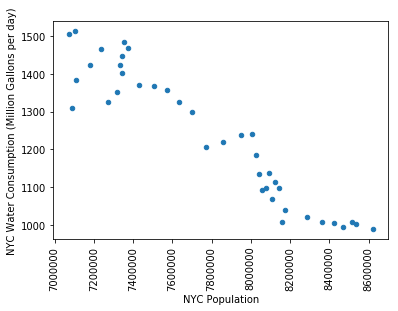

In [14]:
wc_subset.plot.scatter(x='NYC Population',y='NYC Water Consumption (Million Gallons per day)',rot=90)

#### Figure 1: Scatterplot depicting NYC Water Consumption(Miion Galloons per day) against the NYC population.The water consumption appears to decrease with an increase in the population.

### Extra Credit Assignment: Extract the same dataset data using the NYC Open Data API (SODA API)

In [24]:
url= "https://data.cityofnewyork.us/resource/waf7-5gvc.json"
wca_df = pd.read_json(url)
wca_df.dtypes

new_york_city_population                   float64
nyc_consumption_million_gallons_per_day    float64
per_capita_gallons_per_person_per_day        int64
year                                         int64
dtype: object

### Read that file in and show the first 8 rows

In [ ]:
wca_df.plot(x='year',y='new_york_city_population',figsize=(200,50))

In [ ]:
wca_df.head(8)

### Repeat the steps above 1-7 with a CSV file that contains a date/time column and a numerical value. If the dataset you chose has a date column plot each of the axes you had chosen above against that column.

### Comments from vvt221
#### The dataset is not ordered by date . Also date is a numeric value. There, further data cleaning is done by converting the date column from int64 to datetime64
     

In [18]:
wca_subset=wca_df[['new_york_city_population','year']]
wca_subset.rename(columns = {'new_york_city_population':'NYC Population', 
               'year':'Year'}, inplace=True)

wca_subset.dtypes

NYC Population    float64
Year                int64
dtype: object

#### Convert to date format

In [22]:
wca_subset['Year'] =  pd.to_datetime(wca_subset['Year'], format="%Y")
wca_subset.dtypes

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


NYC Population           float64
Year              datetime64[ns]
dtype: object

In [23]:
wca_subset.head(8)

,NYC Population,Year
0,7102100.0,1979-01-01
1,7071639.0,1980-01-01
2,7089241.0,1981-01-01
3,7109105.0,1982-01-01
4,7181224.0,1983-01-01
5,7234514.0,1984-01-01
6,7274054.0,1985-01-01
7,7319246.0,1986-01-01


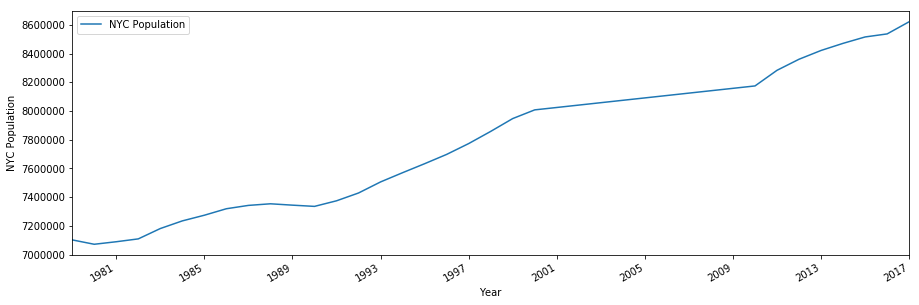

In [149]:

ax = wca_subset.plot(x='Year',y='NYC Population',figsize=(15,5))

ax.set_ylabel("NYC Population")


##### Figure 2: Plot displaying NYC Population as a function of time .Population of New York City increases steathily with each passing year through 1979 to 2017.


In [120]:
wca_subset2=wca_df[['nyc_consumption_million_gallons_per_day','year']]

wca_subset2.rename(columns = {'nyc_consumption_million_gallons_per_day':'NYC Consumption (million gallons per day)', 
               'year':'Year'}, inplace=True)
                                                                                                                                                                                                                                                                           


,NYC Consumption (million gallons per day),Year
0,1512.0,1979
1,1506.0,1980
2,1309.0,1981
3,1382.0,1982
4,1424.0,1983
5,1465.0,1984
6,1326.0,1985


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


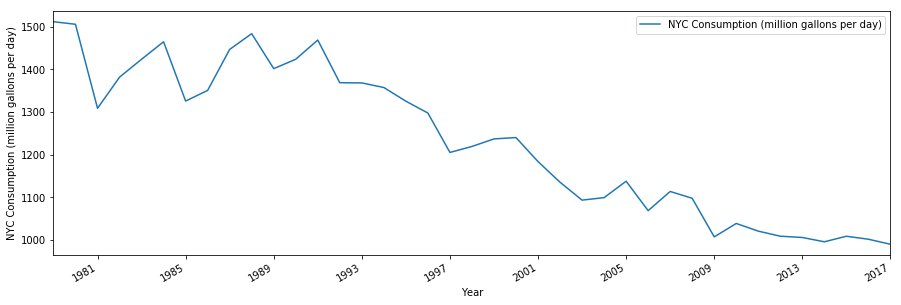

In [146]:
wca_subset2=wca_df[['nyc_consumption_million_gallons_per_day','year']]

wca_subset2.rename(columns = {'nyc_consumption_million_gallons_per_day':'NYC Consumption (million gallons per day)', 
               'year':'Year'}, inplace=True)

wca_subset2['Year'] =  pd.to_datetime(wca_subset2['Year'],yearfirst=True, format="%Y")
ord_df2=wca_subset2.sort_values(by=['Year'])
ord_df2.head(7)

ax = wca_subset2.plot(x='Year',y='NYC Consumption (million gallons per day)',figsize=(15,5))
ax.set_ylabel("NYC Consumption (million gallons per day)")

##### Figure 3 : Plotting NYC water consumption per day in milliion gallons as a function of time . Water consumption per day  in the order of millions of gallons displays a multipe peaks and valleys through the years 1979 to 2017. But there seems to be an overall decline in water consumption over the years 